<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Homework7V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The definition of the variables used in the Bookbinder dataset is given below. Use choice variable as dependent variable.

Choice: Whether the customer purchased the The Art History of Florence. 1 corresponds to a purchase and 0 corresponds to a nonpurchase.

Gender: 0 = Female and 1 = Male.

Amount purchased: Total money spent on BBBC books.

Frequency: Total number of purchases in the chosen period (used as a proxy for frequency.)

Last purchase (recency of purchase): Months since last purchase.

First purchase: Months since first purchase.

P_Child: Number of children’s books purchased.

P_Youth: Number of youth books purchased.

P_Cook: Number of cookbooks purchased.

P_DIY: Number of do-it-yourself books purchased.

P_Art: Number of art books purchased.


In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [2]:
df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df.head()

,Gender,Amount purchased,Frequency,Last purchase,First purchase,P_Child,P_Youth,P_Cook,P_DIY,P_Art,Staus,Choice
0,1,113,8,1,8,0,1,0,0,0,Training,Y
1,1,418,6,11,66,0,2,3,2,3,Training,Y
2,1,336,18,6,32,2,0,1,1,2,Training,Y
3,1,180,16,5,42,2,0,0,1,1,Training,Y
4,0,320,2,3,18,0,0,0,1,2,Training,Y


In [3]:
# Using dataframe df: convert choice to 0(N)and 1(Y)

# Convert 'Choice' column to numerical values (0 for 'N', 1 for 'Y')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})
 #Using dataframe df: Use choice variable as dependent variable.
 #Construct training data and test data  when the status variables having  Training and  Test value.

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame
# Filter the DataFrame for training data
training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']
# Define features (X) and target variable (y)
X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']


In [6]:
#Q1(25 pt)-Using logistic regression model in train data,
#a)	In the model, test that the claim that the coefficients of independent variables are different than 0 at the 5% significance level.
# Add constant for intercept
X_train_const = sm.add_constant(X_train)

# Fit logistic model
logit_model = sm.Logit(y_train, X_train_const).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.435050
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1589
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2264
Time:                        18:55:12   Log-Likelihood:                -696.08
converged:                       True   LL-Null:                       -899.74
Covariance Type:            nonrobust   LLR p-value:                 2.612e-81
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3515      0.214     -1.640      0.101      -0.772       0.069
Gender     

#b	Which variables that is significantly different than 0 increase or decrease the probability of Choice=Yes?
Coefficients with p < 0.05 are statistically significant.

A positive coefficient increases the probability of purchase (Choice=1).

A negative coefficient decreases it.

Best k: 23


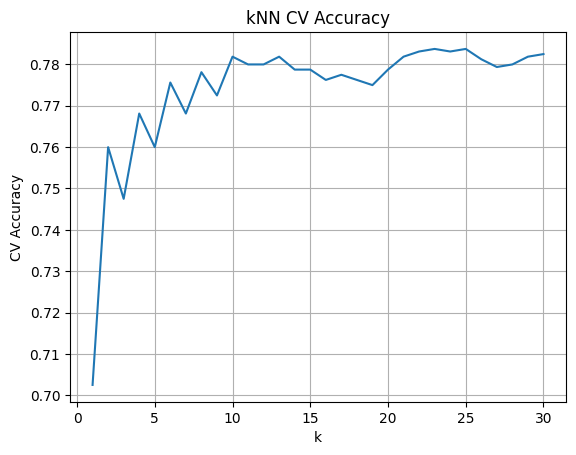

kNN Metrics:
Accuracy: 0.8983, Precision: 0.3881, Recall: 0.2549
Confusion Matrix:
 [[2014   82]
 [ 152   52]]


In [8]:
#Q2(15 pt)-Using knn model in train data(choose k based on CV),
#get the performance metric on test data(accuracy,recall, precision confusion matrix). What is the k value chosen based on k?

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Import StandardScaler


# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try multiple k values
k_range = range(1, 31)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train, cv=5, scoring='accuracy').mean() for k in k_range]

# Choose the best k
best_k = k_range[np.argmax(cv_scores)]
print("Best k:", best_k)

# Plot
plt.plot(k_range, cv_scores)
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('kNN CV Accuracy')
plt.grid(True)
plt.show()

# Train final kNN model and evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

print("kNN Metrics:")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
print("Confusion Matrix:\n", cm)



In [9]:
#Q3(35 pt)-Get the performance metric on test data (accuracy,recall, precision, confsuion matrix area under curve(auc)) using
#Logistic regression,naive bayes, Multi layer perceptor(MLP) and SVM, ligtGBM and kNN with optimized parameter in Q2.
#Report which methods performs best on these metrics?

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

models = {
    'Logistic': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC(probability=True),
    'LightGBM': LGBMClassifier(),
    'kNN': KNeighborsClassifier(n_neighbors=best_k)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    probs = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)
    cm = confusion_matrix(y_test, preds)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'AUC': auc,
        'Confusion Matrix': cm
    }

# Display results
for name, res in results.items():
    print(f"\n{name}:\nAccuracy: {res['Accuracy']:.3f}, Precision: {res['Precision']:.3f}, Recall: {res['Recall']:.3f}, AUC: {res['AUC']:.3f}")
    print("Confusion Matrix:\n", res['Confusion Matrix'])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612

Logistic:
Accuracy: 0.890, Precision: 0.377, Recall: 0.377, AUC: 0.801
Confusion Matrix:
 [[1969  127]
 [ 127   77]]

Naive Bayes:
Accuracy: 0.848, Precision: 0.232, Recall: 0.309, AUC: 0.744
Confusion Matrix:
 [[1888  208]
 [ 141   63]]

MLP:
Accuracy: 0.875, Precision: 0.317, Recall: 0.353, AUC: 0.777
Confusion Matrix:
 [[1941  155]
 [ 132   72]]

SVM:
Accuracy: 0.903, Precision: 0.418, Recall: 0.250, AUC: 0.779
Confusion Matrix:
 [[2025   

In [11]:
#Q4(25 pt)-There is a need to evaluate the effectiveness of the current direct mail program and assess whether predictive modeling
#can be leveraged to enhance targeting and increase response rates.
# Assume that you make profit of 10 $ by selling a book and the cost of sending mail is 0.65 $.
# Based on the logistic model, which customers should Bookbinders target on test data?
#What is the expected profits if these customers are targeted?
#Hint :
#To evaluate the direct mail program, use an ROC curve to assess the logistic model’s ability to predict buyers.
#The curve plots True Positive Rate vs. False Positive Rate, and a high AUC shows the model is effective.
# To decide who to target, calculate profit for different probability thresholds:
# Profit = (True Positives × $9.35) - (False Positives × $0.65).
#True positive profit is $93.5 becuase revenue is $10 and there is a $0.65 cost of sending mail.
#Bookbinders should target customers with probabilities above the threshold that maximizes profit,
# improving targeting and response rates compared to the current program


# Get probabilities from logistic model
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_scaled, y_train)
probs = logit.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.01, 1.0, 0.01)
profits = []

for t in thresholds:
    predictions = (probs >= t).astype(int)
    tp = np.sum((predictions == 1) & (y_test == 1))
    fp = np.sum((predictions == 1) & (y_test == 0))
    profit = (tp * 9.35) - (fp * 0.65)
    profits.append(profit)

# Best threshold
max_profit = max(profits)
best_threshold = thresholds[np.argmax(profits)]
print(f"Best threshold: {best_threshold:.2f}, Max expected profit: ${max_profit:.2f}")

# Who to target?
# Changed 'test_df' to 'test_data' as it is the variable containing the test dataset.
final_targets = test_data[probs >= best_threshold]
print(f"Number of customers to target: {len(final_targets)}")

Best threshold: 0.18, Max expected profit: $1036.40
Number of customers to target: 944
